In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appliances-energy-prediction-data-set/energydata_complete.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

For this project we load data set from sensor reading to predict building energy consumption. Besides sensor reading we get the data from weather station which is temperature and humidity on each measurement was conducted. Sensor data were temperature and humidity of building, in this case is two floor house. 

In [3]:
path = '../input/appliances-energy-prediction-data-set/energydata_complete.csv'
dataLoad = pd.read_csv(path, index_col='date')


## Basic Data Exploration

On the basic data exploration result we can know that the data consist of 28 features and 19735 rows. In the data itself the missing values are not found.

In [4]:
dataLoad.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
dataLoad.shape

(19735, 28)

In [6]:
dataLoad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 11-01-2016 17:00 to 27-05-2016 18:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-nu

In [7]:
dataLoad.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
dataLoad.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Exploratory Data Analysis

Then we do more exploratory data analysis to know the distribution of dataset. I use univariate distribution analysis for each features in the data sets. Also, I do bivarite analysis to know the correlation between target variable which in here is Appliances column and the predictor variable. In the bivariate analysis I also make correlation heatmap to understand correlation between each feature. From the exploratory data analysis we know that some predictor almost have normal distribution. 

### Univariate

In [9]:
dataVisual = dataLoad.drop(['rv1', 'rv2'], axis=1)

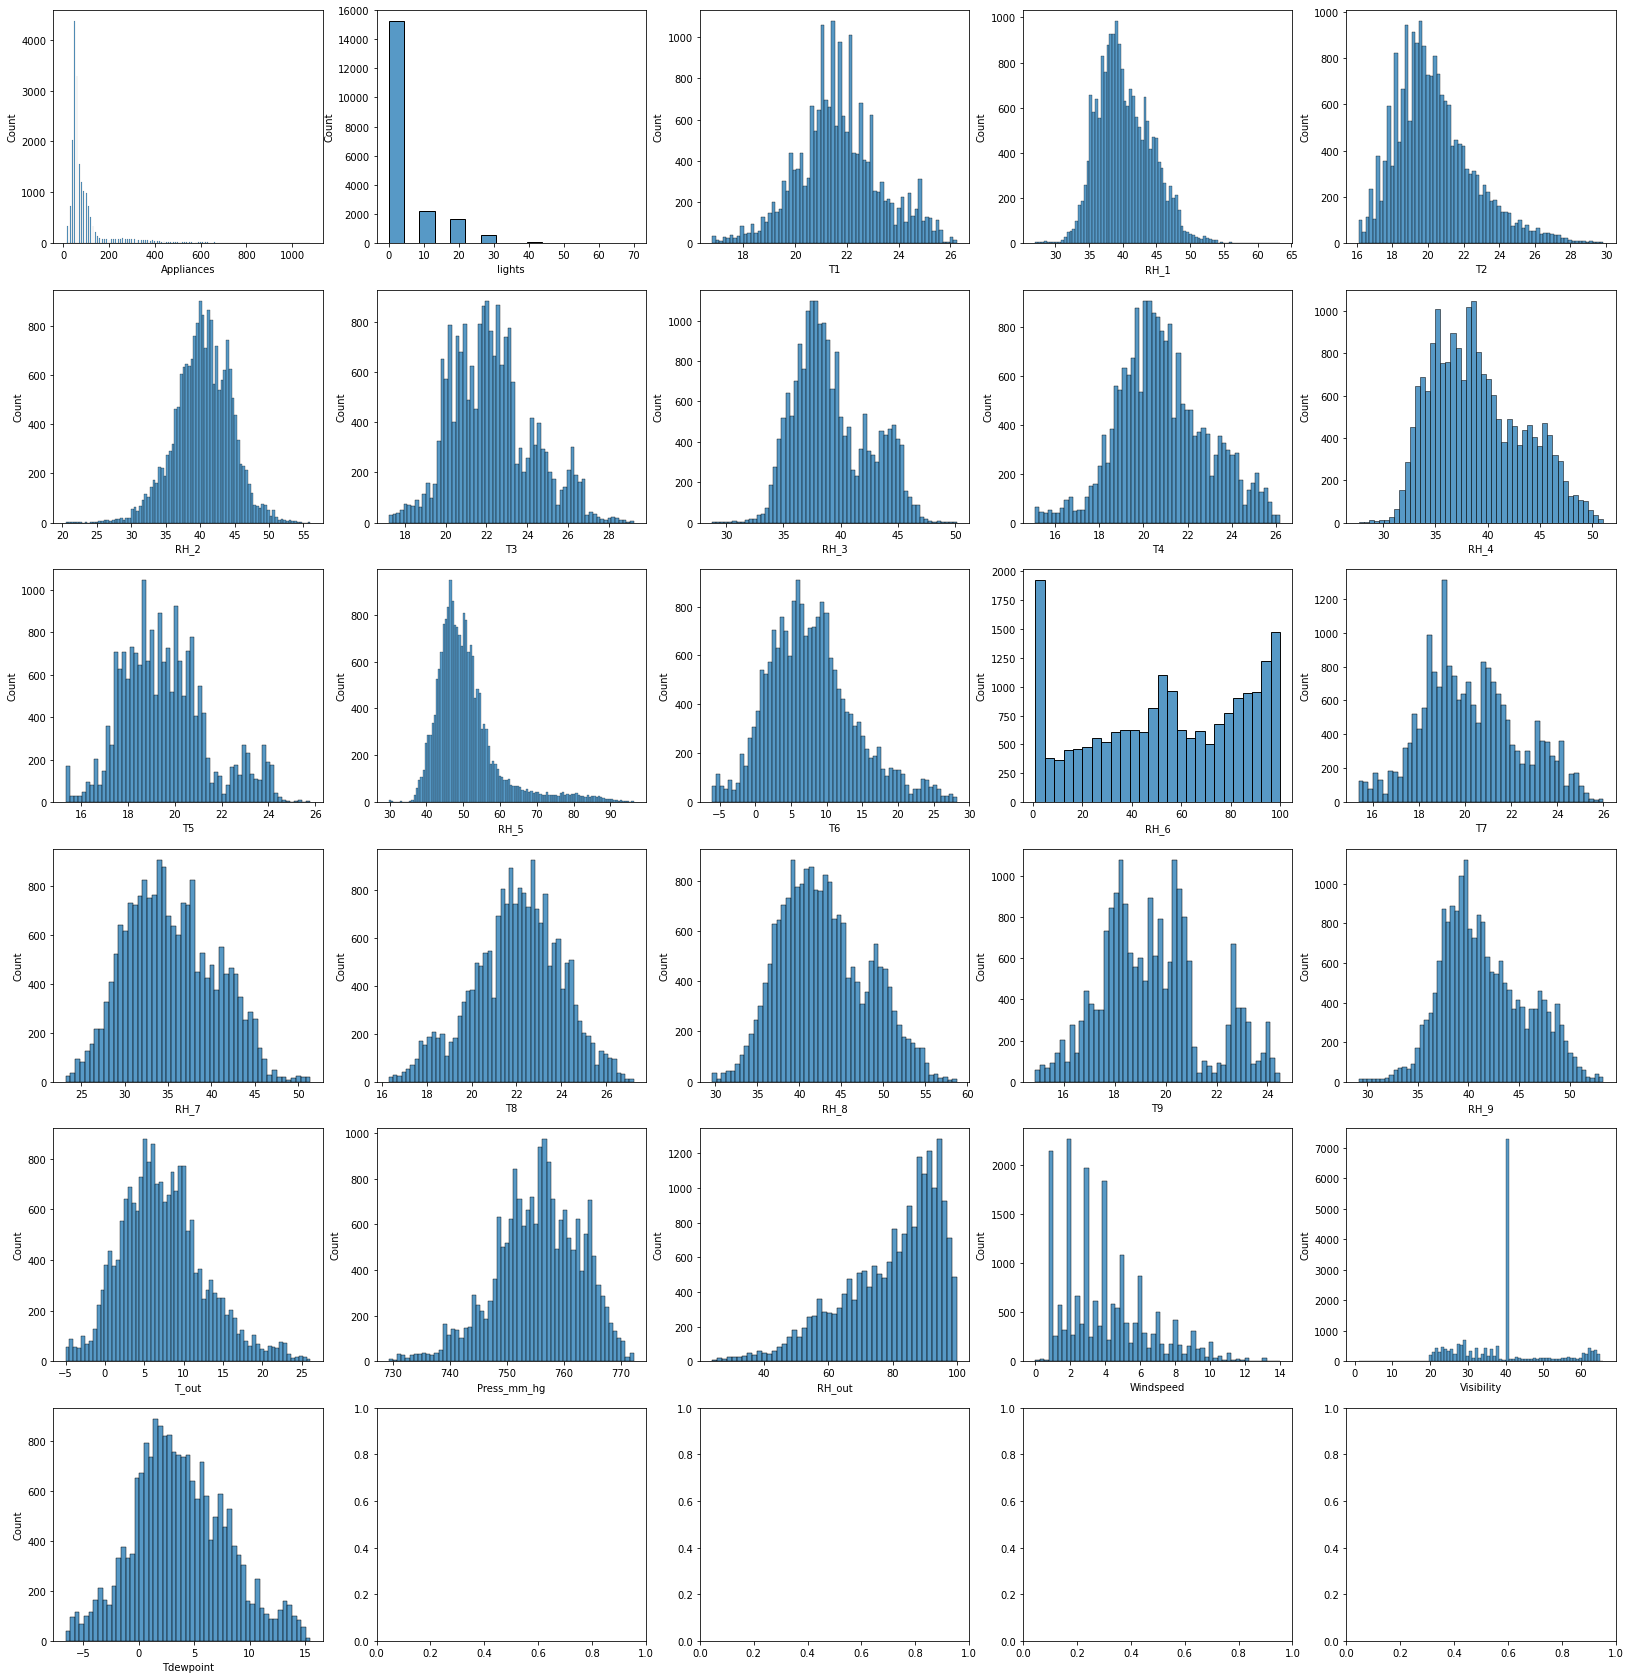

In [10]:
# Distribution plot for each features

ls = []
colName = [j for j in dataVisual.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k], data=dataVisual)
    
        

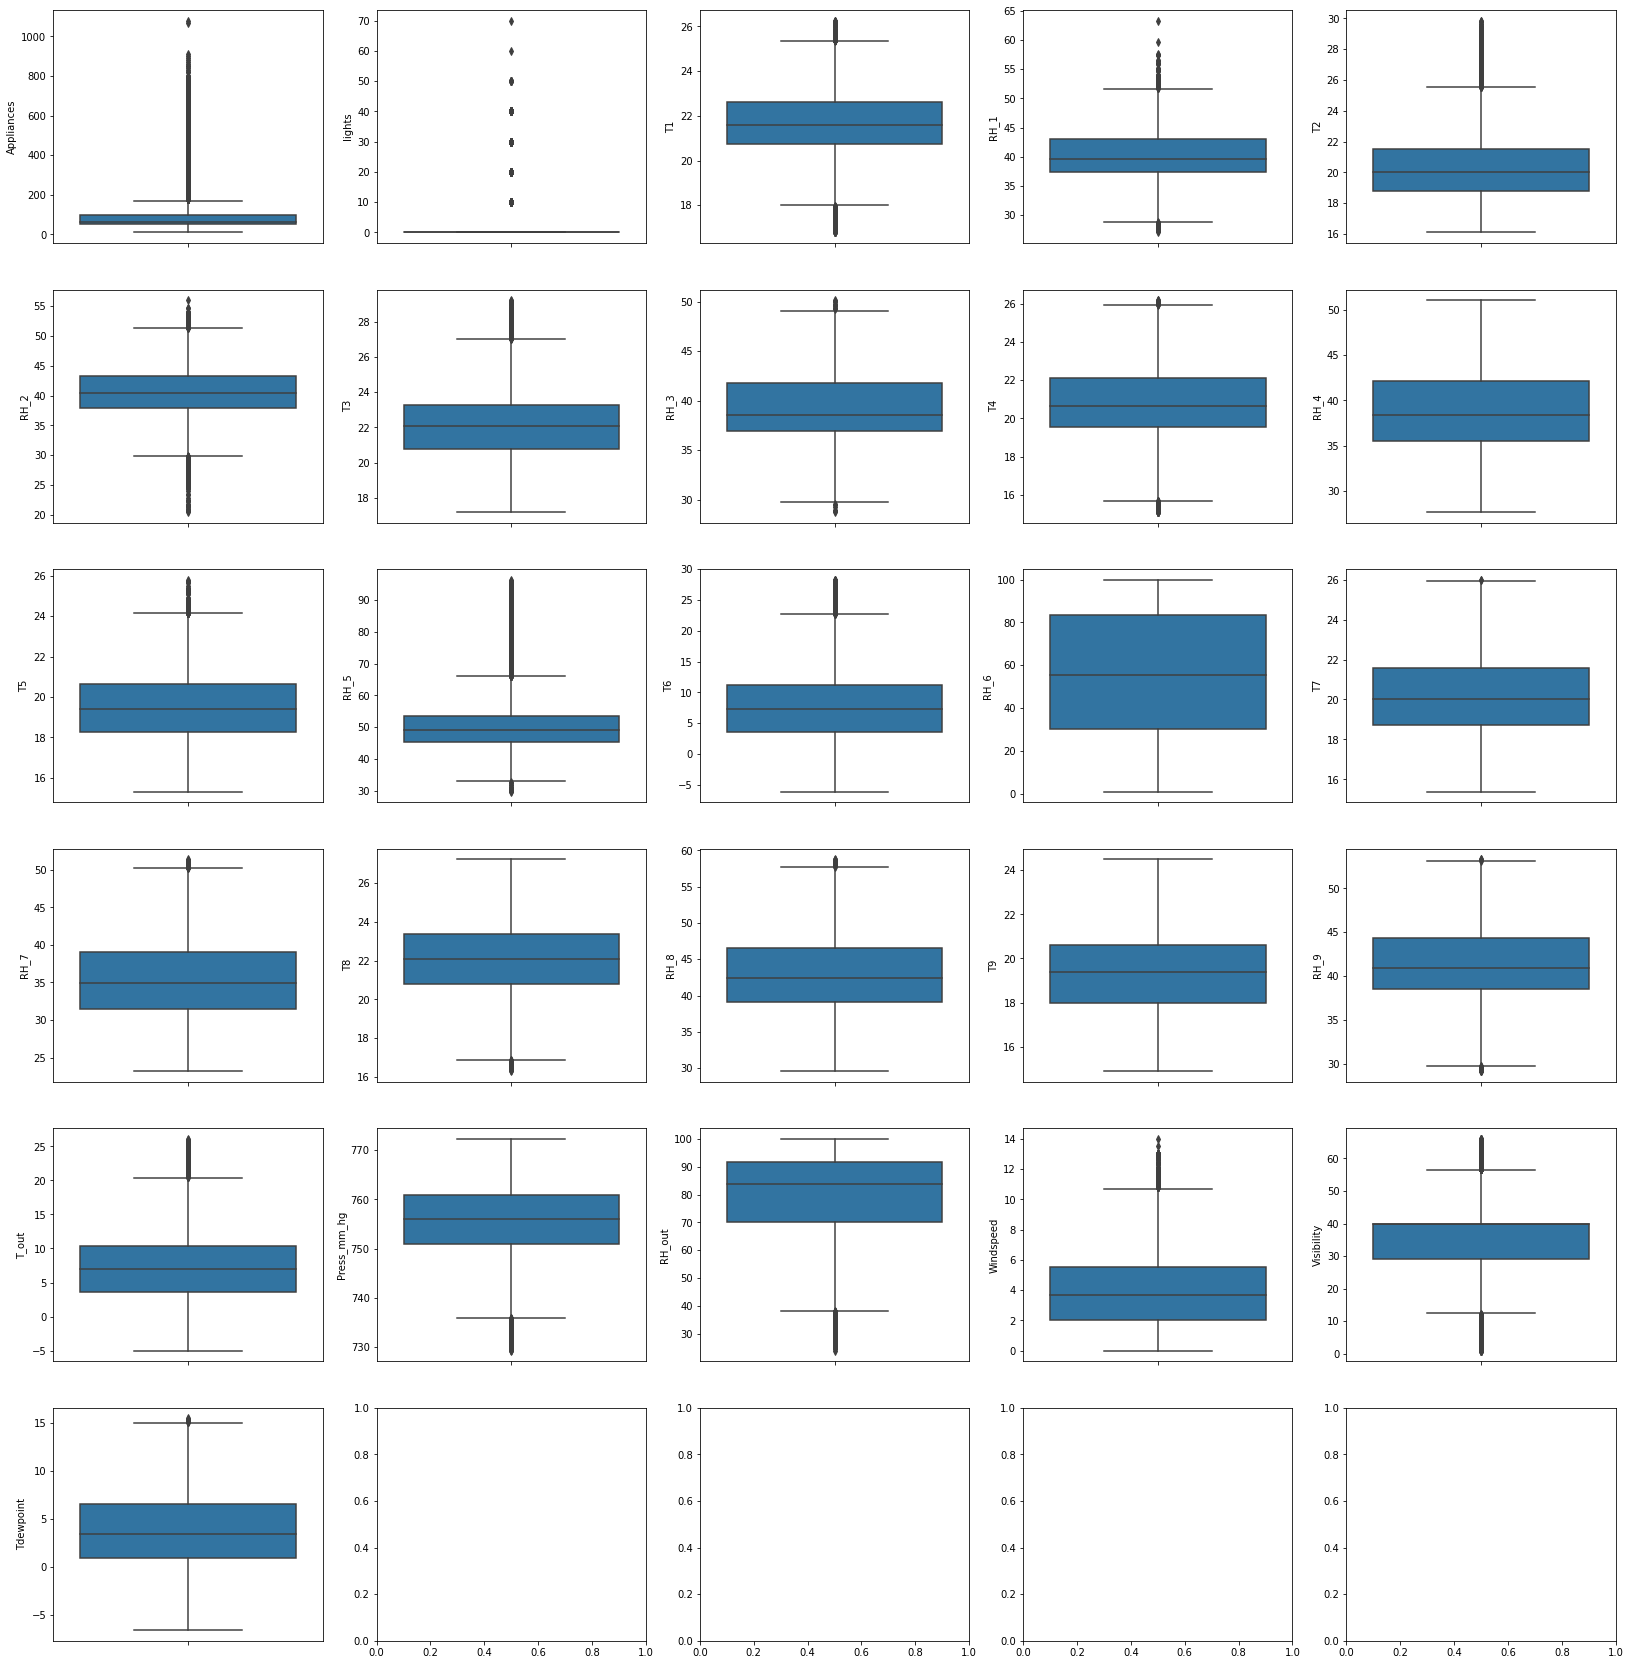

In [11]:
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.boxplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k], data=dataVisual)

## Bivariate

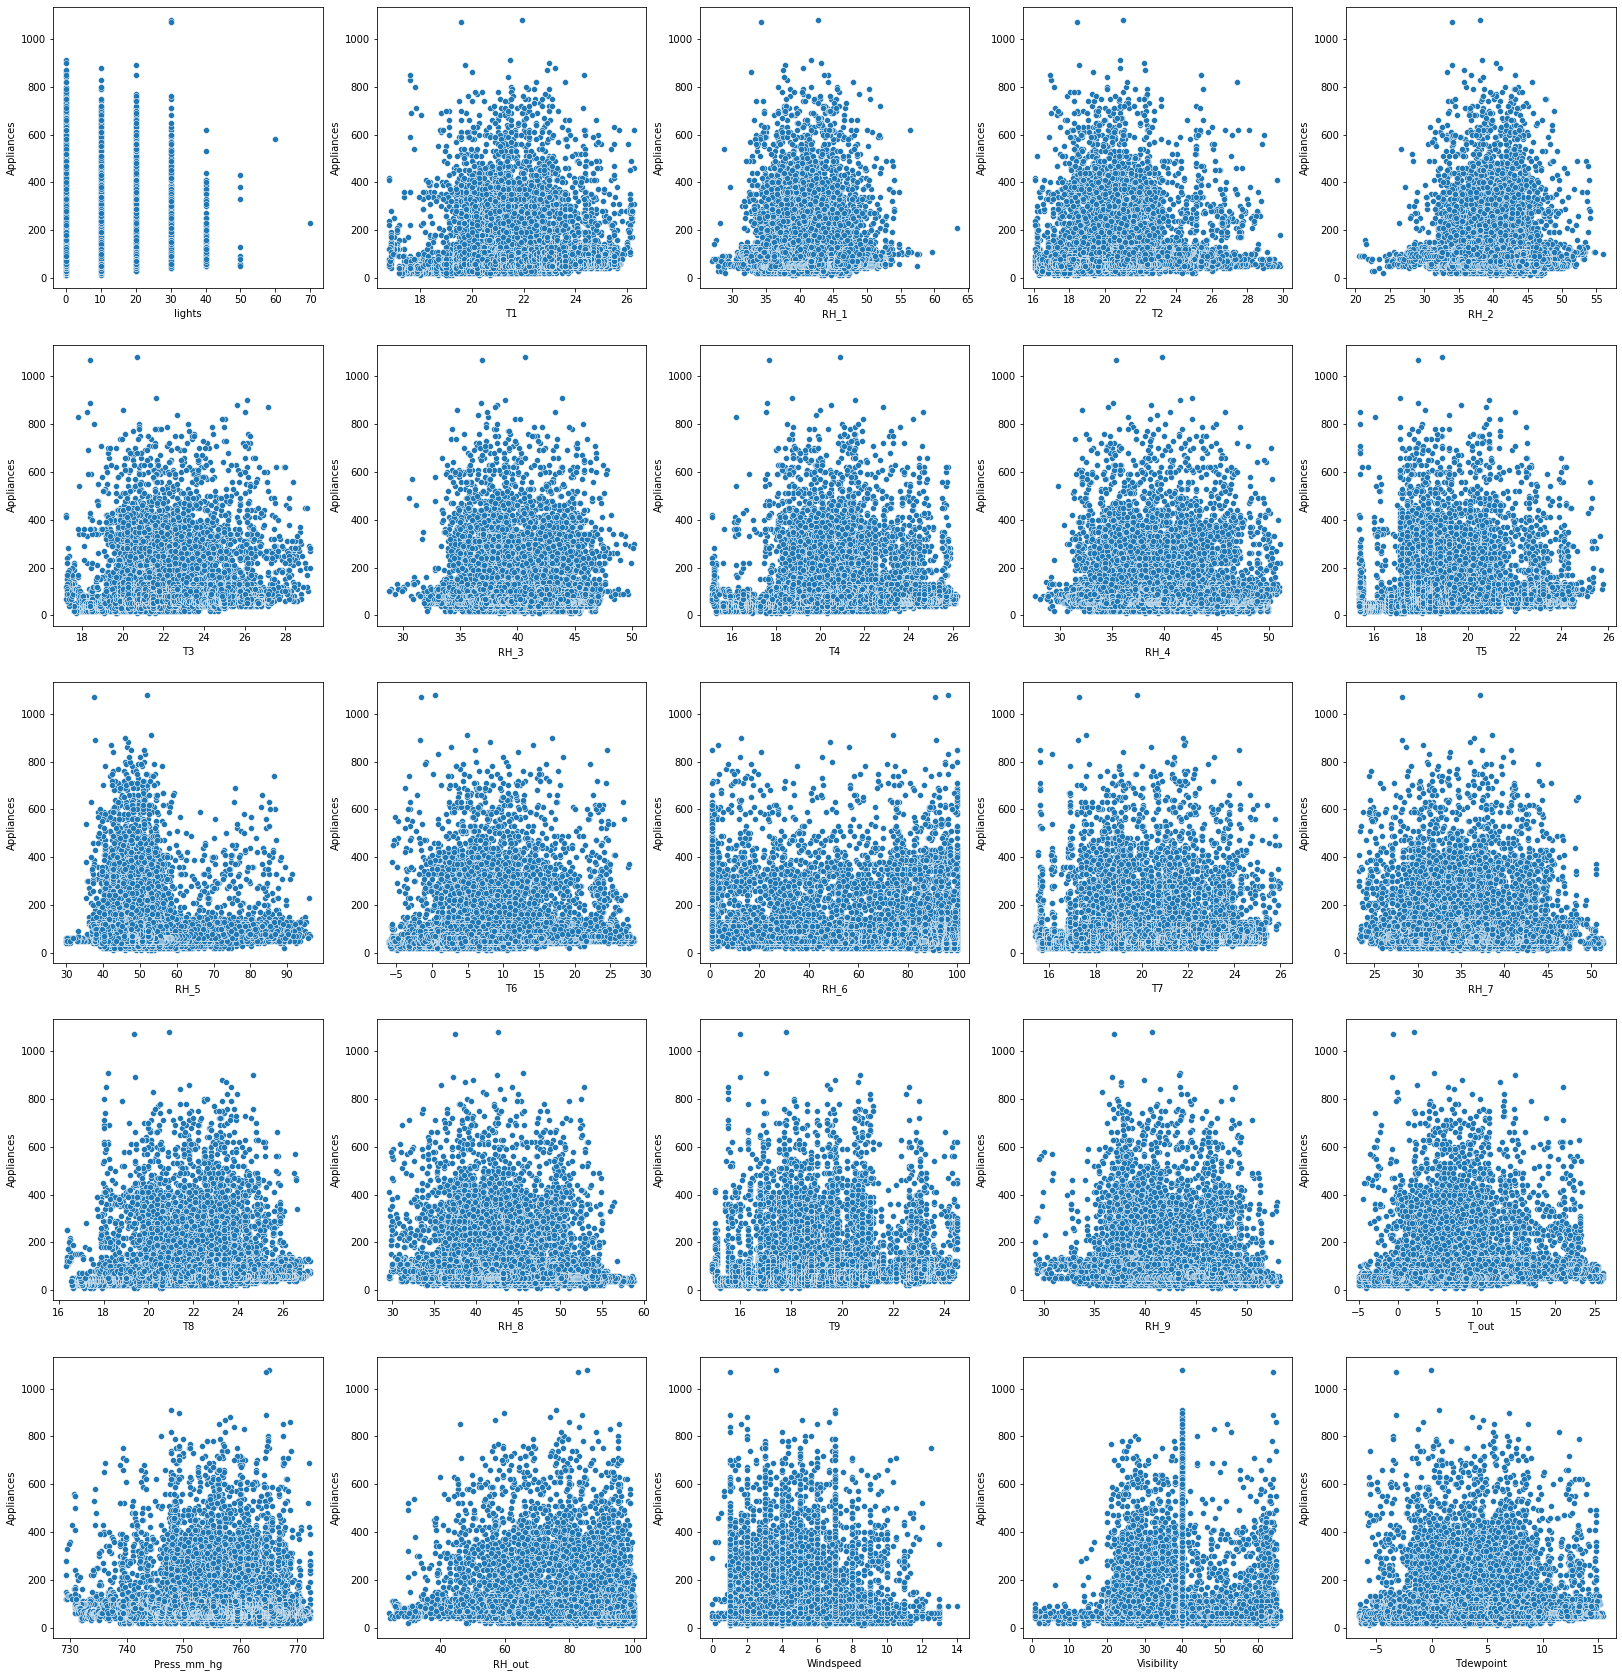

In [12]:
b = 0
while b < 7:
    for i in range(5):
        ls.append((b, i))
    b+=1
fig, ax = plt.subplots(5, 5, figsize=(28, 30))
for k in range(25):
    sns.scatterplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k+1], y=colName[0], data=dataVisual)

<AxesSubplot:>

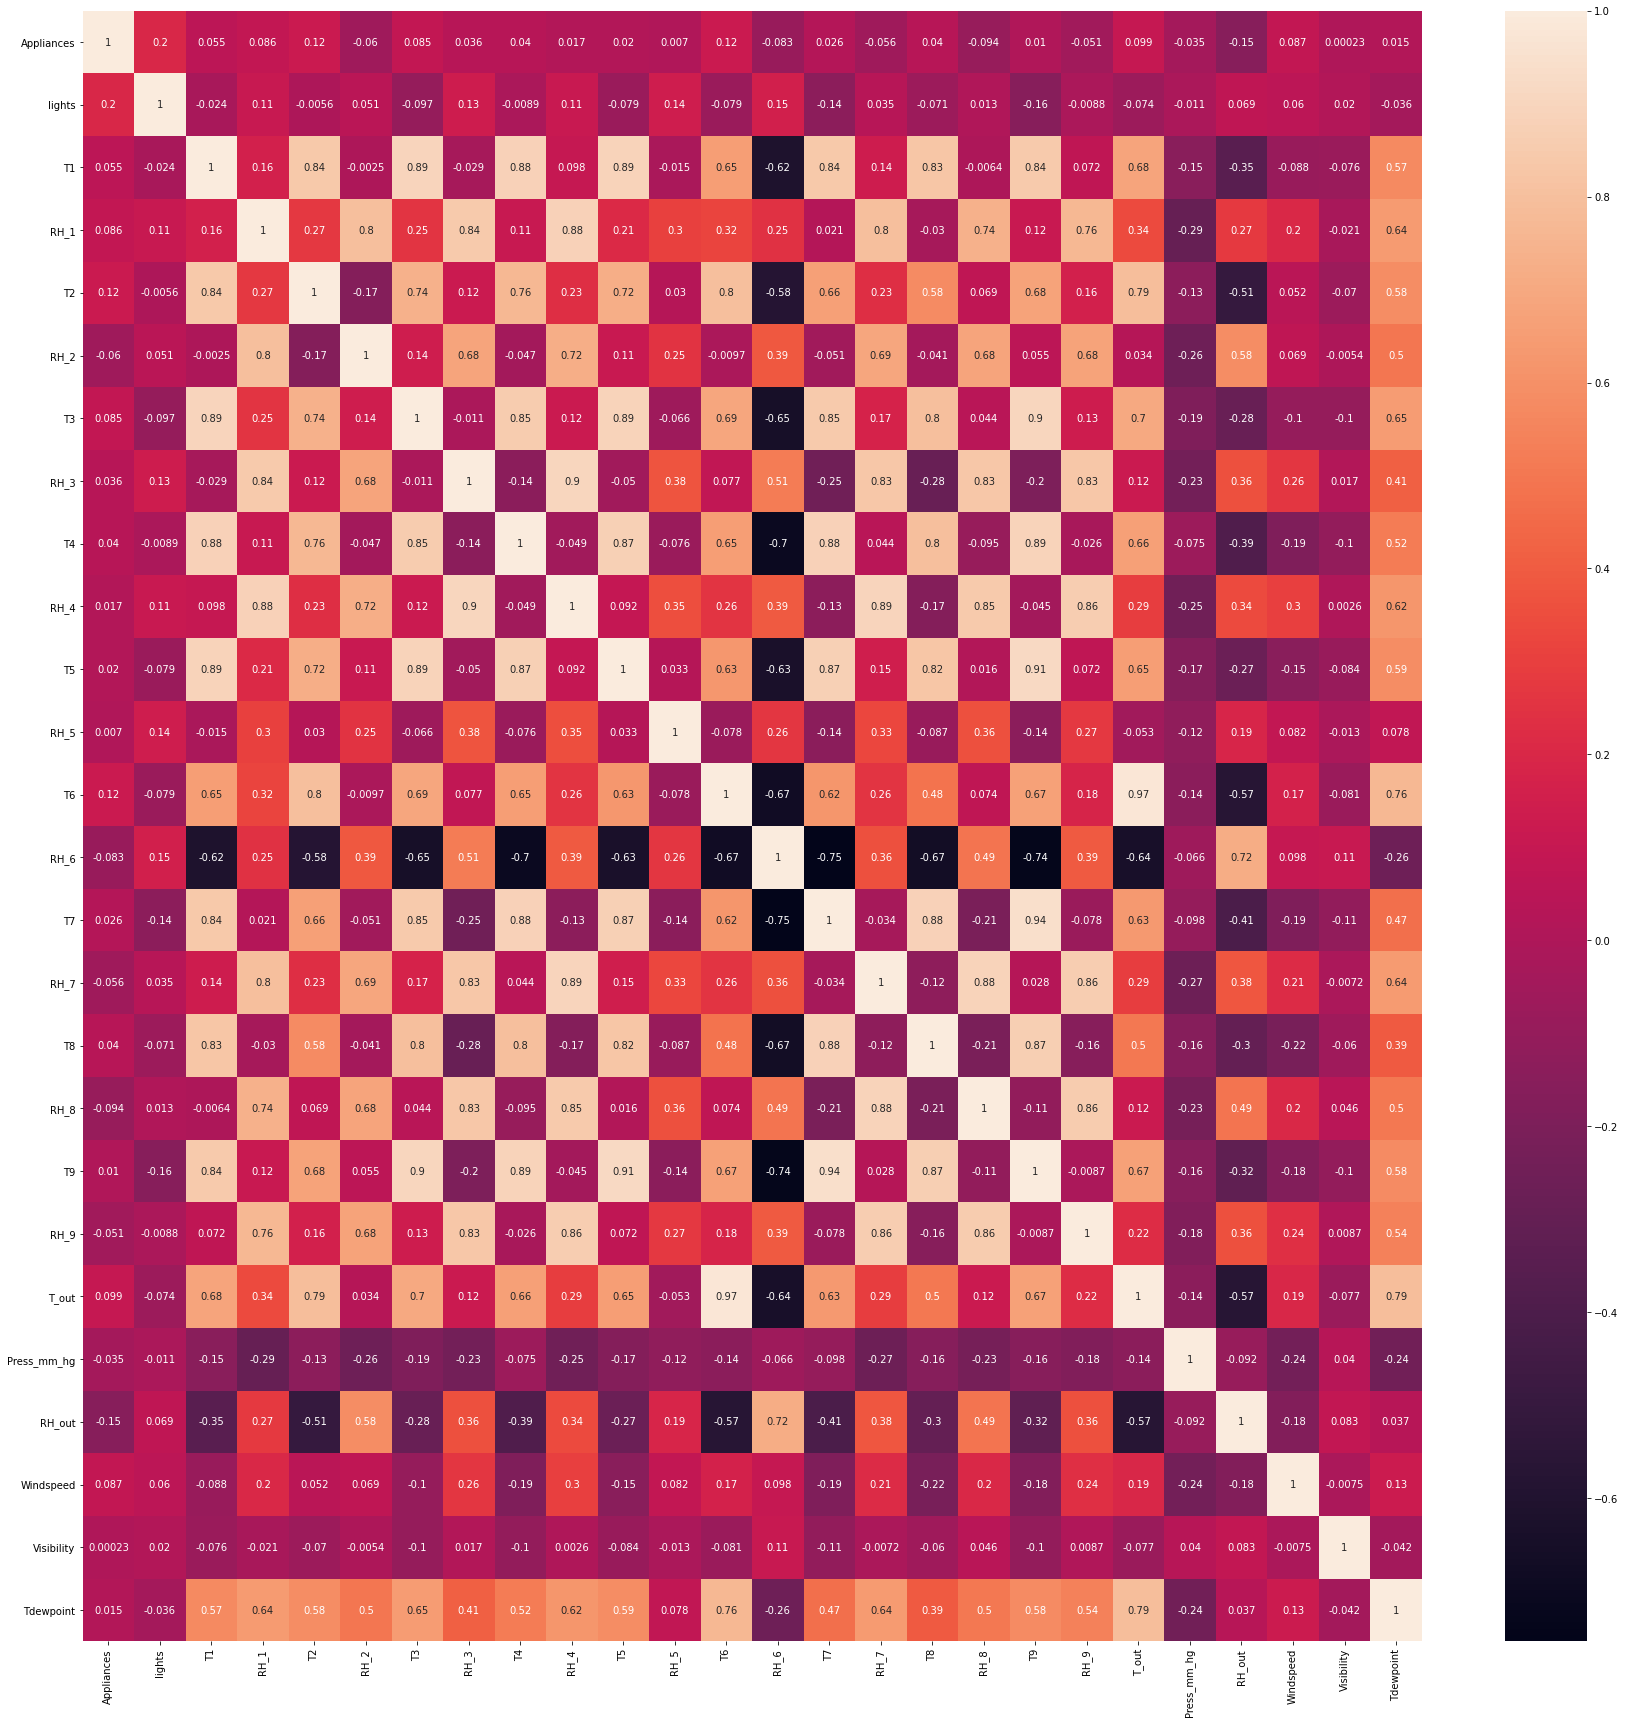

In [13]:
corr = dataVisual.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

## Preprocessing Data

Before the data were pushed to model, I do some preprocessing to avoid poor performance of the model. I do normalization to make distribution of the features become normal. Also, I try to remove outliers of the data. It is because for predictive model that I will use sensitive to outliers and it can make poor performance model. After removing outliers I have found many missing value of the features. I encouter it with filling missing value with imputation method. I use mean value of each feature to fill the missing value.

In [14]:
## Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(dataVisual), columns=dataVisual.columns)
dataTrans.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.173329,0.660155,0.226500,0.678532,0.369132,0.100000,0.894737,0.476190,0.894872,0.533937
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.173329,0.655586,0.219563,0.676049,0.365595,0.102326,0.894737,0.452381,0.835897,0.529412
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.164175,0.650788,0.219563,0.671909,0.357878,0.106977,0.894737,0.404762,0.717949,0.520362


In [15]:
#eliminating outliers
Q1=dataTrans.quantile(0.25)
Q3 = dataTrans.quantile(0.75)
IQR = Q3-Q1

dataClean = dataTrans[~((dataTrans < (Q1-IQR * 1.5)) |(dataTrans > (Q3 + IQR*1.5)))]
dataClean.head()
dataClean.shape

(19735, 26)

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)
dataImp.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.046729,0.0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.615662,0.894737,0.500000,0.529569,0.538462
1,0.046729,0.0,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.173329,0.660155,0.226500,0.678532,0.369132,0.615662,0.894737,0.476190,0.529569,0.533937
2,0.037383,0.0,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.173329,0.655586,0.219563,0.676049,0.365595,0.615662,0.894737,0.452381,0.835897,0.529412
3,0.037383,0.0,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.164175,0.650788,0.219563,0.671909,0.361736,0.615662,0.894737,0.428571,0.776923,0.524887
4,0.046729,0.0,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.164175,0.650788,0.219563,0.671909,0.357878,0.615662,0.894737,0.404762,0.717949,0.520362


In [17]:
dataImp.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

## Features Selection

Then I do feature selection to make sure I use only importance features for training the model and predicting the energy consumption with small error. I try two diffrence approaches for it. First i am using univariate selection with F value. Then, I am also using features importance to find importance feature. In both method I decide to select the 10 best features.

### Univariate Selection

In [18]:
dataTarget = dataImp['Appliances']
dataPred = dataImp.drop('Appliances', axis=1)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataPred, dataTarget, test_size=0.2, random_state=0)

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression, k=10)
fit = selector.fit(dataPred, dataTarget)
dfscores = pd.DataFrame(fit.scores_)
dfpred = pd.DataFrame(dataPred.columns)
featScore = pd.concat([dfpred, dfscores], axis=1)
featScore.columns = ['Feature', 'Score']
featScore.nlargest(10, 'Score')

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,Feature,Score
3,T2,1478.324098
15,T8,1435.651527
21,RH_out,1195.591436
1,T1,1073.495270
12,RH_6,1037.428268
11,T6,884.603121
16,RH_8,856.944863
7,T4,782.462412
18,RH_9,734.715489
19,T_out,728.562614


### Feature Importance

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

<AxesSubplot:>

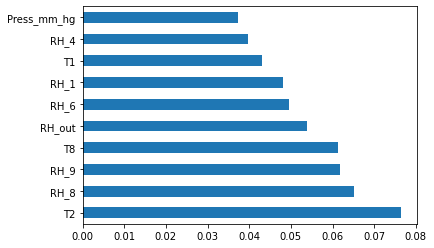

In [22]:
model = ExtraTreesRegressor()
model.fit(x_train, y_train)
feat_importance = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importance.nlargest(10).plot(kind='barh')

## Data Splitting

I am splitting data into two parts training and test data set for each variable. I do this with proportion 80 % of total data are training dataset and the rest are test dataset. Then I split the training dataset again in to two parts training and validation dataset. The second spltting I use proportion 80% of the training data are training data and the rest of data are validation dataset.

In [23]:
y = dataImp['Appliances']
X = dataImp[['T2', 'T6', 'T8', 'T1', 'T_out', 'T4','RH_9', 'RH_6', 'RH_8', 'RH_out', 'lights']]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [25]:
xTrain, xVal, yTrain, yVal = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

## Baseline Model

For baseline model I am using linear regression and random forest regressor. For the linear regression model I keep the parameter deafult. For the random forest regressor I vary the n_estimators parameter from 1 until 100. The metrics to evaluate each model performance is mean absolute error. 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [27]:
regmodel = LinearRegression()
regmodel = regmodel.fit(xTrain, yTrain)
predReg = regmodel.predict(xVal)
maeReg = mean_absolute_error(yVal, predReg)
print('This is MAE score for Linear Regression : ', round(maeReg, 3))

This is MAE score for Linear Regression :  0.017


In [28]:
def modelRF(n, xTrain, yTrain, xVal, yVal):
    modelRF = RandomForestRegressor(n_estimators=n, criterion='mae')
    modelRF.fit(xTrain, yTrain)
    predRF = modelRF.predict(xVal)
    maeRF = mean_absolute_error(yVal, predRF)
    return print('This is MAE score for Random Forest Regressor model', n, 'estimators : ', round(maeRF, 3))

In [29]:
n = [1, 5, 10, 20, 25, 50, 75, 100]

for i in n:
    modelRF(i, xTrain, yTrain, xVal, yVal)

This is MAE score for Random Forest Regressor model 1 estimators :  0.015
This is MAE score for Random Forest Regressor model 5 estimators :  0.013
This is MAE score for Random Forest Regressor model 10 estimators :  0.012
This is MAE score for Random Forest Regressor model 20 estimators :  0.012
This is MAE score for Random Forest Regressor model 25 estimators :  0.011
This is MAE score for Random Forest Regressor model 50 estimators :  0.011
This is MAE score for Random Forest Regressor model 75 estimators :  0.011
This is MAE score for Random Forest Regressor model 100 estimators :  0.011


## Model building 

Finally I build the model with best performance that I know from baseline model. In here I decide to use random forest regressor model with parameter n_estimators are 20 and the criterion parameter is 'mae'.

In [30]:
modelFinal = RandomForestRegressor(n_estimators=20, criterion='mae')
modelFinal.fit(x_train, y_train)
predFinal = modelFinal.predict(x_test)
maeFinal = mean_absolute_error(y_test, predFinal)
print('This is MAE score of final model :', round(maeFinal, 3))

This is MAE score of final model : 0.011
